<a href="https://colab.research.google.com/github/MauriDeluca/pandas/blob/master/calentamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
import cv2 as cv

In [7]:
url = "https://raw.githubusercontent.com/MauriDeluca/pandas/master/CPS1985.csv"

In [11]:
df = pd.read_csv(url)
print(df.head(10))

   Unnamed: 0   wage  education  ...         sector  union married
0           1   5.10          8  ...  manufacturing     no     yes
1        1100   4.95          9  ...  manufacturing     no     yes
2           2   6.67         12  ...  manufacturing     no      no
3           3   4.00         12  ...          other     no      no
4           4   7.50         12  ...          other     no     yes
5           5  13.07         13  ...          other    yes      no
6           6   4.45         10  ...          other     no      no
7           7  19.47         12  ...          other     no      no
8           8  13.28         16  ...  manufacturing     no     yes
9           9   8.75         12  ...          other     no      no

[10 rows x 12 columns]


In [26]:
df.drop(df.columns[0], axis='columns', inplace=True)

In [27]:
df.shape

(534, 11)

In [32]:
pd.isnull(df).any()

wage          False
education     False
experience    False
age           False
ethnicity     False
region        False
gender        False
occupation    False
sector        False
union         False
married       False
dtype: bool

In [37]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
529    False
530    False
531    False
532    False
533    False
Length: 534, dtype: bool

In [42]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


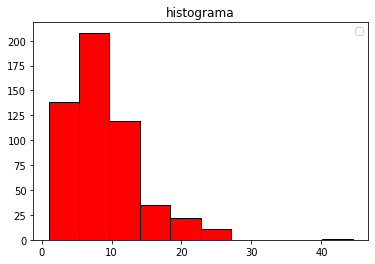

In [46]:
plt.hist(df["wage"],histtype="bar",color="red",edgecolor = 'black',  linewidth=1)
plt.title ("histograma")
plt.legend()
   
plt.show()

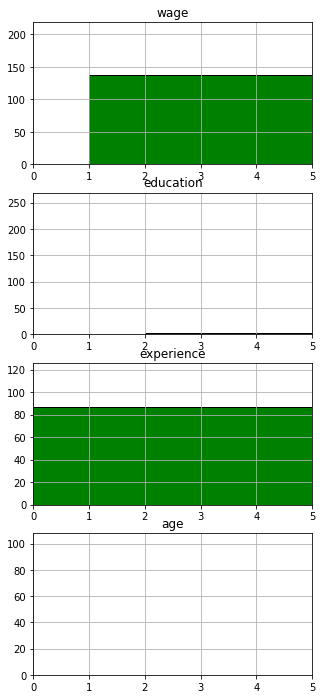

In [57]:
variables = ["wage", "education", "experience", "age"]

fig = plt.figure(figsize=(5, 12))
for i, v in enumerate(variables):
    fig.add_subplot(4, 1, i+1)
    ax = df[v].plot(kind='hist',color= "green", edgecolor = 'black',  linewidth=1)
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(v)
    ax.grid()

<BarContainer object of 534 artists>

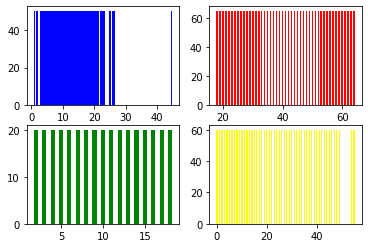

In [69]:
plt.subplot(221)
plt.bar(df["wage"],color="blue",height=50,width=0.5)
plt.subplot
plt.subplot(222)
plt.bar(df["age"],color="red",height=65,width=0.5)
plt.subplot(223)
plt.bar(df["education"],color="green",height=20,width=0.5)
plt.subplot(224)
plt.bar(df["experience"],color="yellow",height=60,width=0.5)

{'boxes': [<matplotlib.lines.Line2D at 0x7f91718a6630>],
 'caps': [<matplotlib.lines.Line2D at 0x7f91718b2080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91718b2b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91718b2780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91718a6940>,
  <matplotlib.lines.Line2D at 0x7f91718a6cc0>]}

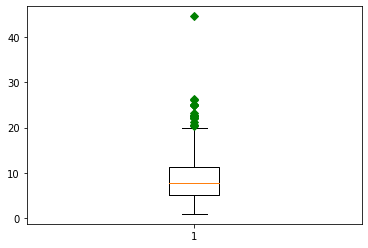

In [75]:
plt.boxplot(df["wage"], 0, 'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x7f91718ea4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f91718eaeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91718e7978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91718e75f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91718ea7b8>,
  <matplotlib.lines.Line2D at 0x7f91718eab38>]}

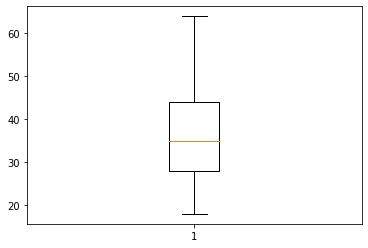

In [74]:
plt.boxplot(df["age"], 0, 'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x7f917187a6d8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9171887128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9171887ba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9171887828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f917187a9e8>,
  <matplotlib.lines.Line2D at 0x7f917187ad68>]}

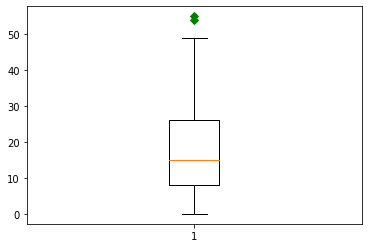

In [76]:
plt.boxplot(df["experience"], 0, 'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x7f91717d6d30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f91717e5780>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91717f0240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91717e5e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91717e5080>,
  <matplotlib.lines.Line2D at 0x7f91717e5400>]}

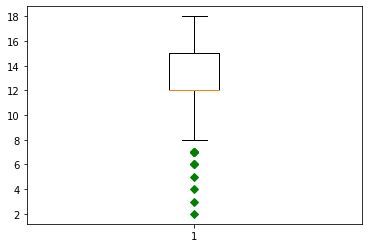

In [77]:
plt.boxplot(df["education"], 0, 'gD')

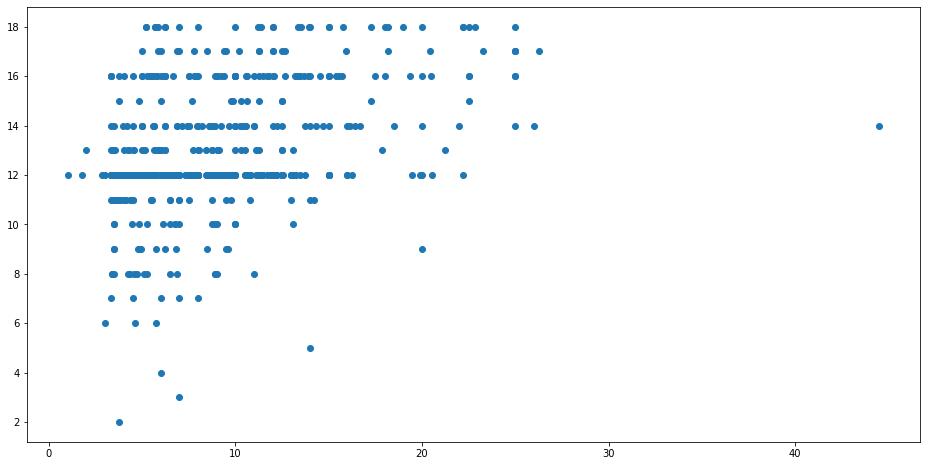

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['wage'], df['education'])
plt.show()

In [99]:
import numpy as np
def outliers(df): 
    q1, q3= np.percentile(df,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    return np.where((df > upper_bound and df < lower_bound))
    print(outliers)